# DIMENSIONALITY REDUCTION

### Content :
  > * Feature selection
  > * Feature extraction
  > * Advantages of dimensionality reduction
  > * PCA
  > * Practical implementation : Wholesale Customer dataset

### Requirement:
> * Pandas
> * Numpy
> * Matplotlib
> * Scikit learn
> * Ipython
> * Visual.py file used for ploting 

## Introduction to dimensionality reduction

Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables.

COMPONENTS OF DIMENSIONALITY REDUCTION
- feature selection
- feature extraction.

Example :We are training a model for predicting the heights of people and we have data with features( weights, color, moles, marital status, gender). We can see that the features like color, moles and marital status are not linked with the heights of people i.e., irrelevant to our problem of finding heights of people. Hence we need to come up with a solution of finding features which are most useful for our task.

**Feature selection** : tries to find a subset of the input variables.

The three strategies are: 
1. the filter strategy (e.g. information gain), 
2. the wrapper strategy (e.g. search guided by accuracy),
3. the embedded strategy (selected features add or are removed while building the model based on prediction errors).

**Feature projection (Feature extraction)** : transforms the data from the high-dimensional space to a space of fewer dimensions. 

The data transformation may be
- linear, as in principal component analysis (PCA),
- nonlinear dimensionality reduction techniques also exist.

**Advantages of dimensionality reduction**
1. It reduces the time and storage space required.
2. Removal of multi-collinearity improves the interpretation of the parameters of the machine learning model.
3. It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D.
4. It avoids the curse of dimensionality.

## PRINCIPAL COMPONENT ANALYSIS(PCA)
**UNSUPERVISED LINEAR FEATURE PROJECTION**

PCA is mostly used as a tool in **exploratory data analysis** and for making predictive models. It is often used to visualize genetic distance and relatedness between populations. 

**STEPS FOR DIMENSION REDUCTION**
1. Organize data as an m×n matrix, where m is the number of measurement types and n is the number of samples.
2. Subtract off the mean for each measurement type.
3. Calculate the SVD or the eigenvectors and eigen value of the covariance.
4. Now the eigen value with higher value corresponds to eigen vector with high variance.
5. Only use those dimension which contain maximum information(ie high eigen values)

## Practical Implementation
### DATA

We will be using a [Wholesale customers dataset](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers#) from the [UCI Machine learning repository](https://archive.ics.uci.edu/ml/index.php) which has a very good collection of datasets.

Features used in this project:
- FRESH
- MILK
- GROCERY
- FROZEN
- DETERGENTS_PAPER
- DELICATESSEN

### IMPORT THE LIBRARIES

In [9]:
"""import neccessary libraries for this project"""

# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### LOAD DATA

In [10]:
"""read the csv file using pandas library"""
# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Data is missing")

Wholesale customers dataset has 440 samples with 6 features each.


### DATA EXPLORATION

In [11]:
""" Display a description of the dataset"""
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [12]:
"""understand the features of the data by observing few samples"""
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [28]:
# Select three indices of your choice you wish to sample from the dataset
indices = [85,181,338]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550


#### VISUALISE FEATURE DISTRIBUTION

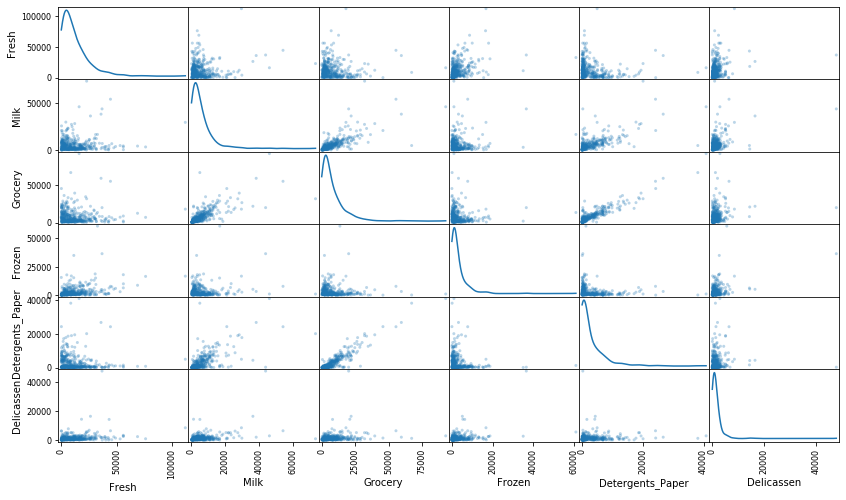

In [29]:
"""Produce a scatter matrix for each pair of features in the data"""

pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### DATA PREPROCESSING

 To understand the customer better we need to scale the data and detect the outliers

#### FEATURE SCALING

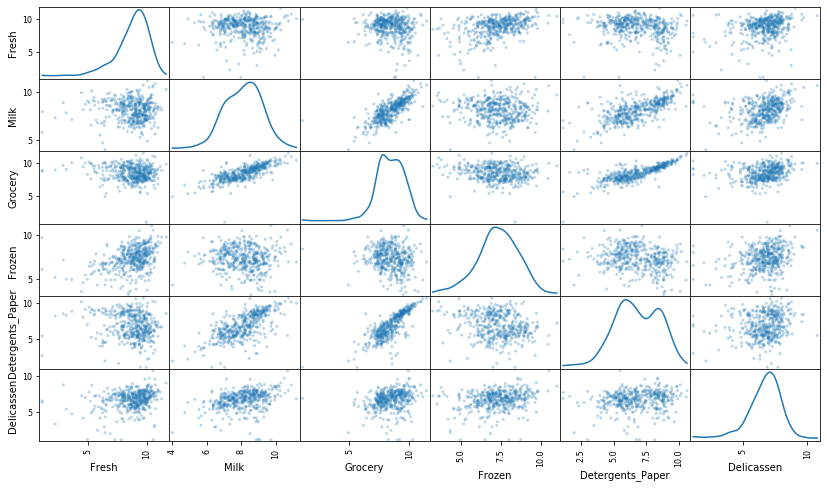

In [30]:
"""Scale the data and sample using the natural logarithm and plot the scatter matrix"""
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### FEATURE TRANSFORMATION

Using techniques like PCA can help us understand which compound combination of features can best describe the customer,as it maximises the variance.

#### PCA

In [31]:
"""Apply PCA by fitting the data with the same number of dimensions as features"""

'Apply PCA by fitting the data with the same number of dimensions as features'

In [32]:
log_samples.shape

(3, 6)

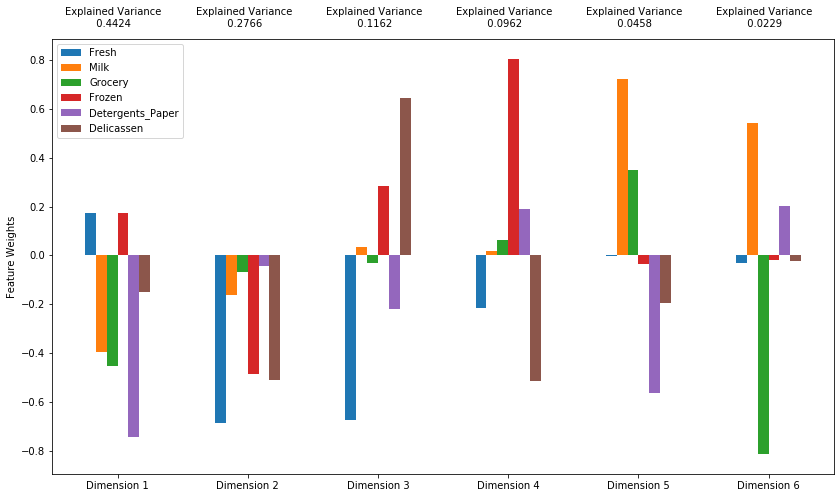

In [37]:
#  Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=log_data.shape[1])
pca = pca.fit(log_data)

#  Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(log_data, pca)


### Observations

- The variance explained by the first two Principal Components is the 70.68% of the total.

- The variance explained by the first three Principal Components is the 93.11% of the total.

- Dimensions discussion:

    - Dimension 1: This dimension represents well, in terms of negative variance, the following features: Detergent_Paper, Milk and groceries. Mostly utilities for everyday consuming.
    
    - Dimension 2: This dimension represents well, in terms of negative variance, the following features: Fresh, Frozen and Delicatessen. Mostly food consuming.
    
    - Dimension 3: This dimension represents well, in terms of positive variance, the Delicatessen features, and in terms of negative variance de Fresh feature. Food to be consumed on the day.
    
    - Dimension 4: This dimension represents well, in terms of positive variance, the Frozen feature, and in terms of negative variance, the Delicatessen Feature. Food that can be storaged.
    

In [38]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3459,-1.9442,-0.7429,-0.2108,0.5297,-0.2928
1,-2.1974,-4.9048,-0.0686,0.5623,0.5195,0.2369
2,2.8963,4.7798,6.3817,2.9243,0.7629,-2.2292


**DIMENSIONALITY REDUCTION**

In [39]:
"""reduce the dimention from no of features to 2 and visualise biplot"""

# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(log_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(log_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [40]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3459,-1.9442
1,-2.1974,-4.9048
2,2.8963,4.7798


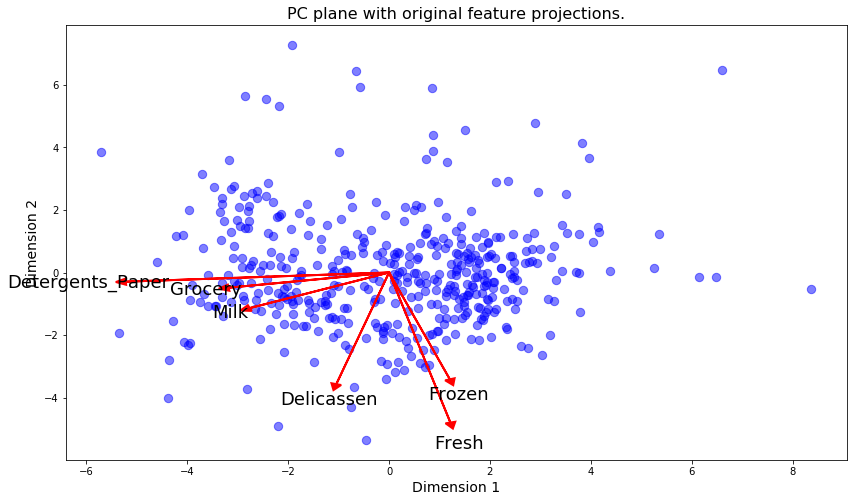

In [41]:
# Create a biplot
vs.biplot(log_data, reduced_data, pca)

### FURTHER READING :
- https://en.wikipedia.org/wiki/Principal_component_analysis
- https://en.wikipedia.org/wiki/Dimensionality_reduction